Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed_20102019.pkl")

In [4]:
data.reset_index(drop=True, inplace=True)

In [5]:
data.head()

,Would_live_in_another_neighborhood,District,Woman,Car,House_size,No_of_people_in_the_house,Time_living_in_barri,Barri_evolution,BCN_evolution,Barri_future,...,BCN_transport,Barri_problem_with_security,Barri_problem_with_streets_cleaning,Barri_problem_with_mobility,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,0.0,CIUTAT VELLA,1,1.0,51-100 M2,TWO,MORE THAN 10 YEARS,IT HAS WORSENED,IT HAS IMPROVED,IT WILL IMPROVE,...,GOOD,0,0,0,1,0,0,0,0,0
1,0.0,CIUTAT VELLA,1,0.0,101-150 M2,TWO,MORE THAN 10 YEARS,IT HAS IMPROVED,IT HAS IMPROVED,IT WILL IMPROVE,...,GOOD,0,0,0,0,0,0,0,0,0
2,1.0,CIUTAT VELLA,1,0.0,51-100 M2,TWO,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT HAS WORSENED,IT HAS WORSENED,IT WILL WORSEN,...,GOOD,0,0,0,0,0,1,0,0,0
3,0.0,CIUTAT VELLA,1,0.0,< 50 M2,ONE,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS THE SAME,IT WILL STAY THE SAME,...,"NEITHER BAD, NOR GOOD",1,0,0,0,0,0,0,0,0
4,1.0,CIUTAT VELLA,0,0.0,< 50 M2,ONE,MORE THAN 10 YEARS,IT HAS IMPROVED,IT HAS IMPROVED,IT WILL IMPROVE,...,GOOD,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(12758, 29)

In [7]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'House_size',
 'No_of_people_in_the_house',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']

In [8]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_live_in_another_neighborhood))

Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,11340,0
1.0,0,1418


Would_live_in_another_neighborhood,0.0,1.0
District,,
CIUTAT VELLA,741,160
EIXAMPLE,1914,164
GRÀCIA,921,88
HORTA - GUINARDÓ,1290,180
LES CORTS,1021,49
NOU BARRIS,1158,209
SANT ANDREU,940,149
SANT MARTÍ,1359,166
SANTS - MONTJUÏC,972,203


Would_live_in_another_neighborhood,0.0,1.0
Woman,,
0,4446,526
1,6894,892


Would_live_in_another_neighborhood,0.0,1.0
Car,,
0.0,5874,719
1.0,5466,699


Would_live_in_another_neighborhood,0.0,1.0
House_size,,
101-150 M2,1373,117
51-100 M2,7843,1058
< 50 M2,793,124
> 150 M2,496,40
I DON'T KNOW,835,79


Would_live_in_another_neighborhood,0.0,1.0
No_of_people_in_the_house,,
ONE,3421,433
THREE OR MORE,1868,204
TWO,6051,781


Would_live_in_another_neighborhood,0.0,1.0
Time_living_in_barri,,
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,1628,128
LESS THAN 10 YEARS,573,165
MORE THAN 10 YEARS,9139,1125


Would_live_in_another_neighborhood,0.0,1.0
Barri_evolution,,
IT HAS IMPROVED,5962,573
IT HAS WORSENED,1984,465
IT IS THE SAME,3394,380


Would_live_in_another_neighborhood,0.0,1.0
BCN_evolution,,
IT HAS IMPROVED,3733,371
IT HAS WORSENED,4266,698
IT IS THE SAME,3341,349


Would_live_in_another_neighborhood,0.0,1.0
Barri_future,,
IT WILL IMPROVE,6375,608
IT WILL STAY THE SAME,3483,432
IT WILL WORSEN,1482,378


Would_live_in_another_neighborhood,0.0,1.0
BCN_future,,
IT WILL IMPROVE,5906,645
IT WILL STAY THE SAME,2795,359
IT WILL WORSEN,2639,414


Would_live_in_another_neighborhood,0.0,1.0
Barri_satisfaction,,
FAIRLY SATISFIED,749,368
NOT SATISFIED,45,94
SATISFIED,10546,956


Would_live_in_another_neighborhood,0.0,1.0
BCN_satisfaction,,
FAIRLY SATISFIED,1090,238
NOT SATISFIED,106,21
SATISFIED,10144,1159


Would_live_in_another_neighborhood,0.0,1.0
Barri_security,,
BAD,1528,363
GOOD,4707,423
"NEITHER BAD, NOR GOOD",5105,632


Would_live_in_another_neighborhood,0.0,1.0
BCN_security,,
BAD,1766,293
GOOD,3171,320
"NEITHER BAD, NOR GOOD",6403,805


Would_live_in_another_neighborhood,0.0,1.0
Barri_management,,
BAD,512,147
GOOD,5861,514
"NEITHER BAD, NOR GOOD",4967,757


Would_live_in_another_neighborhood,0.0,1.0
BCN_management,,
BAD,972,162
GOOD,4918,486
"NEITHER BAD, NOR GOOD",5450,770


Would_live_in_another_neighborhood,0.0,1.0
Barri_comparison,,
"NEITHER THE BEST, NOR THE WORST",4250,868
ONE OF THE BEST,6852,317
ONE OF THE WORST,238,233


Would_live_in_another_neighborhood,0.0,1.0
Barri_transport,,
BAD,1240,232
GOOD,9104,1016
"NEITHER BAD, NOR GOOD",996,170


Would_live_in_another_neighborhood,0.0,1.0
BCN_transport,,
BAD,845,146
GOOD,9333,1109
"NEITHER BAD, NOR GOOD",1162,163


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_security,,
0,9650,1170
1,1690,248


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_streets_cleaning,,
0,10400,1317
1,940,101


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_mobility,,
0,10833,1361
1,507,57


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_evolution,,
0,10282,1280
1,1058,138


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_future,,
0,9649,1141
1,1691,277


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_satisfaction,,
0,10835,1076
1,505,342


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_transport,,
0,10616,1279
1,724,139


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_management,,
0,11076,1339
1,264,79


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_security,,
0,10881,1276
1,459,142


In [9]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'House_size',
 'No_of_people_in_the_house',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']

In [10]:
x_var = ['District', # neighbourhood & city
 'Woman', # gender
 'Car', # support / health
 'House_size', # housing
 'No_of_people_in_the_house', # housing
 'Time_living_in_barri', # neighbourhood & city
 'Barri_evolution', # neighbourhood & city
 'Barri_future', # neighbourhood & city
 'Barri_satisfaction', # neighbourhood & city
 'Barri_security', # neighbourhood & city
 'Barri_management', # neighbourhood & city
 'Barri_comparison', # neighbourhood & city
 'Barri_transport', # neighbourhood & city
 'BCN_over_barri_evolution', # neighbourhood & city
 'BCN_over_barri_future', # neighbourhood & city
 'BCN_over_barri_satisfaction', # neighbourhood & city
 'BCN_over_barri_transport', # neighbourhood & city 
 'BCN_over_barri_management', # neighbourhood & city
 'BCN_over_barri_security'] # neighbourhood & city

In [11]:
y = data['Would_live_in_another_neighborhood']

In [12]:
x = pd.get_dummies(data[x_var])

In [13]:
x.columns.tolist()

['Woman',
 'Car',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security',
 'District_CIUTAT VELLA',
 'District_EIXAMPLE',
 'District_GRÀCIA',
 'District_HORTA - GUINARDÓ',
 'District_LES CORTS',
 'District_NOU BARRIS',
 'District_SANT ANDREU',
 'District_SANT MARTÍ',
 'District_SANTS - MONTJUÏC',
 'District_SARRIÀ - SANT GERVASI',
 'House_size_101-150 M2',
 'House_size_51-100 M2',
 'House_size_< 50 M2',
 'House_size_> 150 M2',
 "House_size_I DON'T KNOW",
 'No_of_people_in_the_house_ONE',
 'No_of_people_in_the_house_THREE OR MORE',
 'No_of_people_in_the_house_TWO',
 'Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
 'Time_living_in_barri_LESS THAN 10 YEARS',
 'Time_living_in_barri_MORE THAN 10 YEARS',
 'Barri_evolution_IT HAS IMPROVED',
 'Barri_evolution_IT HAS WORSENED',
 'Barri_evolution_IT IS THE SAME',
 'Barri_future_IT WILL IMPROVE',
 'Barri_future_IT 

In [14]:
for i in ['District_EIXAMPLE',
          'House_size_< 50 M2',
          'No_of_people_in_the_house_ONE',
          'Time_living_in_barri_LESS THAN 10 YEARS',
          'Barri_evolution_IT HAS IMPROVED',
          'Barri_future_IT WILL IMPROVE',
          'Barri_satisfaction_SATISFIED',
          'Barri_security_GOOD',
          'Barri_management_GOOD',
          'Barri_comparison_ONE OF THE BEST',
          'Barri_transport_GOOD']:
    del x[i]

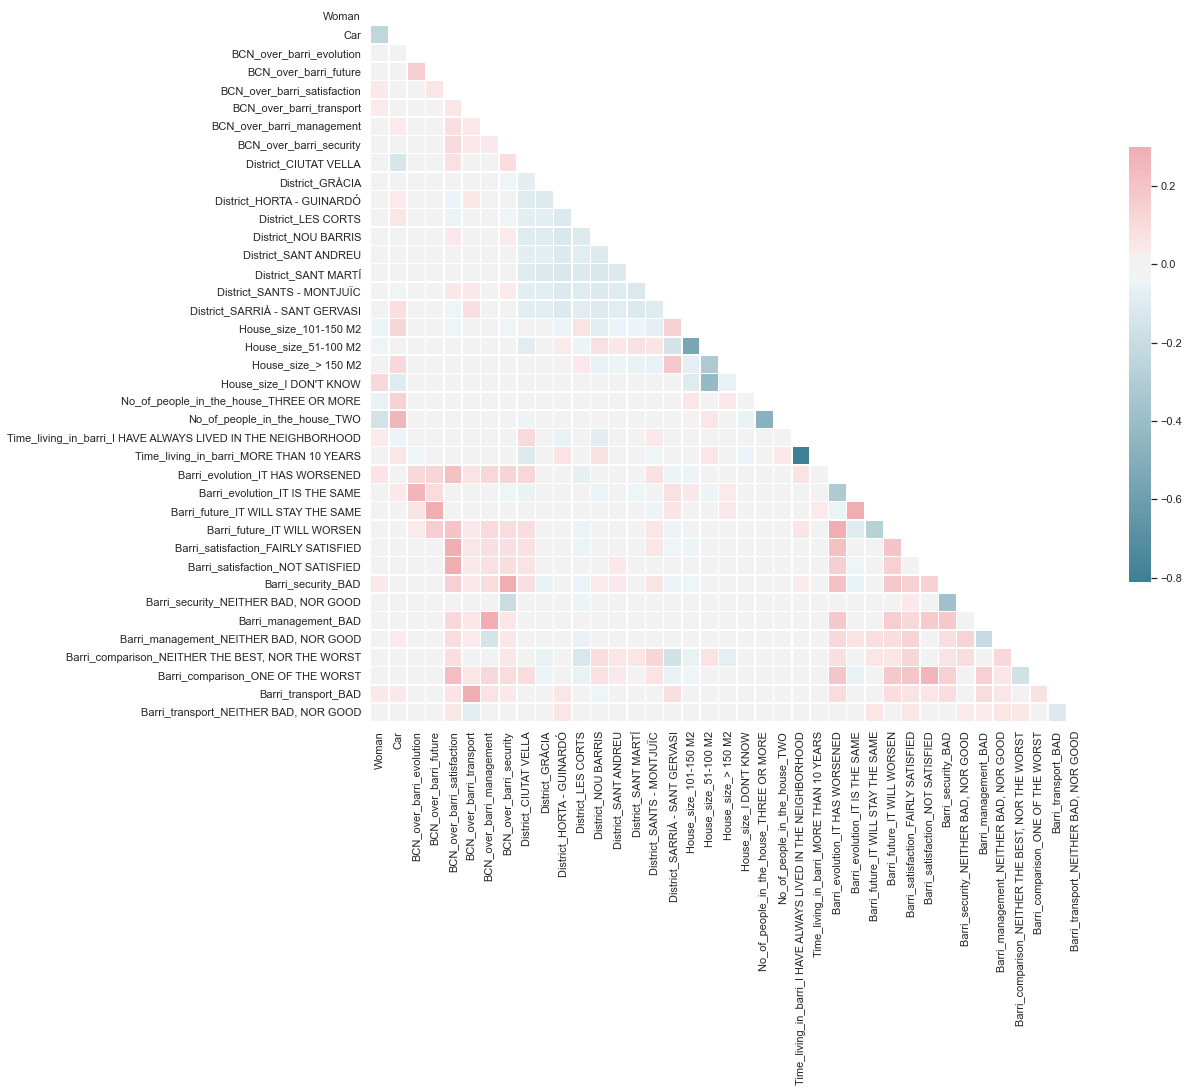

In [15]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = x.corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, #annot = corr.round(2), 
            linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
x = sm.add_constant(x)

# Logit

In [17]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12718
Model Family:                                Binomial   Df Model:                           39
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3693.1
Date:                                Sun, 09 May 2021   Deviance:                       7386.2
Time:                                        22:11:25   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.5594      0.184    -13.908      0.000      -2.920      -2.199
Woman                                                            0.0724      0.066      1.093      0.274      -0.057       0.202
Car                                                              0.1964      0.070      2.800      0.005       0.059       0.334
BCN_over_barri_evolution                                        -0.0278      0.113     -0.246      0.805      -0.249       0.193
BCN_over_barri_future                                            0.2171      0.092      2.370      0.018       0.038       0.397
BCN_over_barri_satisfaction                                      0.4695      0.143      3.280      0.001       0.189       0.750
BCN_over_barri_transport                                         0.0443      0.166      0.267      0.789      -0.280       0.369
BCN_over_barri_management                                        0.1836      0.225      0.815      0.415      -0.258       0.625
BCN_over_barri_security                                          0.3107      0.140      2.212      0.027       0.035       0.586
District_CIUTAT VELLA                                            0.4291      0.138      3.116      0.002       0.159       0.699
District_GRÀCIA                                                  0.2131      0.147      1.453      0.146      -0.074       0.501
District_HORTA - GUINARDÓ                                        0.3718      0.123      3.034      0.002       0.132       0.612
District_LES CORTS                                              -0.2258      0.174     -1.301      0.193      -0.566       0.114
District_NOU BARRIS                                              0.2510      0.123      2.036      0.042       0.009       0.493
District_SANT ANDREU                                             0.1886      0.133      1.419      0.156      -0.072       0.449
District_SANT MARTÍ                                              0.1284      0.125      1.030      0.303      -0.116       0.373
District_SANTS - MONTJUÏC                                        0.3570      0.125      2.866      0.004       0.113       0.601
District_SARRIÀ - SANT GERVASI                                  -0.2059      0.176     -1.172      0.241      -0.550       0.138
House_size_101-150 M2                                           -0.0258      0.156     -0.165      0.869      -0.331       0.279
House_size_51-100 M2                                             0.07

In [18]:
glm_logit_results.aic

7466.164713719905

In [19]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-112848.71105575065

In [20]:
glm_logit_results.pvalues.sort_values(ascending=False)

House_size_> 150 M2                                             8.894608e-01
House_size_101-150 M2                                           8.686157e-01
Barri_security_BAD                                              8.617099e-01
Barri_future_IT WILL STAY THE SAME                              8.358081e-01
BCN_over_barri_evolution                                        8.053853e-01
BCN_over_barri_transport                                        7.893045e-01
Barri_evolution_IT HAS WORSENED                                 7.038295e-01
Barri_management_BAD                                            6.931183e-01
No_of_people_in_the_house_TWO                                   5.162611e-01
House_size_51-100 M2                                            5.075906e-01
BCN_over_barri_management                                       4.149557e-01
Barri_security_NEITHER BAD, NOR GOOD                            3.754045e-01
District_SANT MARTÍ                                             3.029745e-01

In [21]:
for i in ['House_size_> 150 M2', 'House_size_101-150 M2', 'House_size_51-100 M2', "House_size_I DON'T KNOW",
         'BCN_over_barri_evolution', 'BCN_over_barri_transport', 'BCN_over_barri_management',
         'Barri_security_NEITHER BAD, NOR GOOD', 'Barri_security_BAD']:
    del x[i]

In [22]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12727
Model Family:                                Binomial   Df Model:                           30
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3698.1
Date:                                Sun, 09 May 2021   Deviance:                       7396.2
Time:                                        22:13:07   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.5577      0.155    -16.477      0.000      -2.862      -2.253
Woman                                                            0.0559      0.066      0.848      0.396      -0.073       0.185
Car                                                              0.2057      0.070      2.956      0.003       0.069       0.342
BCN_over_barri_future                                            0.2227      0.090      2.466      0.014       0.046       0.400
BCN_over_barri_satisfaction                                      0.4686      0.143      3.285      0.001       0.189       0.748
BCN_over_barri_security                                          0.3689      0.117      3.143      0.002       0.139       0.599
District_CIUTAT VELLA                                            0.4118      0.136      3.027      0.002       0.145       0.678
District_GRÀCIA                                                  0.2105      0.146      1.442      0.149      -0.076       0.497
District_HORTA - GUINARDÓ                                        0.3711      0.122      3.047      0.002       0.132       0.610
District_LES CORTS                                              -0.2337      0.173     -1.347      0.178      -0.574       0.106
District_NOU BARRIS                                              0.2533      0.122      2.078      0.038       0.014       0.492
District_SANT ANDREU                                             0.1885      0.132      1.429      0.153      -0.070       0.447
District_SANT MARTÍ                                              0.1363      0.124      1.101      0.271      -0.106       0.379
District_SANTS - MONTJUÏC                                        0.3647      0.123      2.962      0.003       0.123       0.606
District_SARRIÀ - SANT GERVASI                                  -0.2206      0.174     -1.265      0.206      -0.562       0.121
No_of_people_in_the_house_THREE OR MORE                         -0.2732      0.103     -2.656      0.008      -0.475      -0.072
No_of_people_in_the_house_TWO                                   -0.0469      0.076     -0.616      0.538      -0.196       0.103
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.4600      0.142    -10.267      0.000      -1.739      -1.181
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9470      0.106     -8.916      0.000      -1.155      -0.739
Barri_evolution_IT HAS WORSENED                                 -0.04

In [23]:
glm_logit_results.aic

7458.246019788664

In [24]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-112923.7149739251

In [25]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_future_IT WILL STAY THE SAME                              8.712457e-01
Barri_evolution_IT HAS WORSENED                                 6.606498e-01
No_of_people_in_the_house_TWO                                   5.382164e-01
Woman                                                           3.962779e-01
District_SANT MARTÍ                                             2.708797e-01
District_SARRIÀ - SANT GERVASI                                  2.058972e-01
Barri_evolution_IT IS THE SAME                                  1.875285e-01
Barri_management_BAD                                            1.803038e-01
District_LES CORTS                                              1.778676e-01
Barri_transport_NEITHER BAD, NOR GOOD                           1.671270e-01
District_SANT ANDREU                                            1.530592e-01
District_GRÀCIA                                                 1.494259e-01
Barri_management_NEITHER BAD, NOR GOOD                          1.044341e-01

In [26]:
for i in ['Barri_evolution_IT IS THE SAME', 'Barri_evolution_IT HAS WORSENED',
          'Woman']:
    del x[i]

In [27]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12730
Model Family:                                Binomial   Df Model:                           27
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3699.3
Date:                                Sun, 09 May 2021   Deviance:                       7398.7
Time:                                        22:13:59   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.5571      0.144    -17.776      0.000      -2.839      -2.275
Car                                                              0.1937      0.068      2.829      0.005       0.059       0.328
BCN_over_barri_future                                            0.2254      0.090      2.499      0.012       0.049       0.402
BCN_over_barri_satisfaction                                      0.4694      0.142      3.295      0.001       0.190       0.749
BCN_over_barri_security                                          0.3715      0.117      3.173      0.002       0.142       0.601
District_CIUTAT VELLA                                            0.4153      0.136      3.064      0.002       0.150       0.681
District_GRÀCIA                                                  0.2141      0.146      1.467      0.142      -0.072       0.500
District_HORTA - GUINARDÓ                                        0.3789      0.121      3.119      0.002       0.141       0.617
District_LES CORTS                                              -0.2310      0.173     -1.333      0.183      -0.571       0.109
District_NOU BARRIS                                              0.2633      0.121      2.169      0.030       0.025       0.501
District_SANT ANDREU                                             0.1960      0.132      1.489      0.136      -0.062       0.454
District_SANT MARTÍ                                              0.1472      0.123      1.194      0.233      -0.095       0.389
District_SANTS - MONTJUÏC                                        0.3714      0.123      3.022      0.003       0.130       0.612
District_SARRIÀ - SANT GERVASI                                  -0.2223      0.174     -1.276      0.202      -0.564       0.119
No_of_people_in_the_house_THREE OR MORE                         -0.2799      0.103     -2.731      0.006      -0.481      -0.079
No_of_people_in_the_house_TWO                                   -0.0518      0.076     -0.684      0.494      -0.200       0.097
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.4419      0.142    -10.187      0.000      -1.719      -1.165
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9311      0.106     -8.821      0.000      -1.138      -0.724
Barri_future_IT WILL STAY THE SAME                              -0.0180      0.081     -0.223      0.823      -0.176       0.140
Barri_future_IT WILL WORSEN                                      0.19

In [28]:
glm_logit_results.aic

7454.693091196468

In [29]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-112949.62964393171

In [30]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_future_IT WILL STAY THE SAME                              8.232153e-01
No_of_people_in_the_house_TWO                                   4.938005e-01
District_SANT MARTÍ                                             2.325768e-01
District_SARRIÀ - SANT GERVASI                                  2.020921e-01
Barri_management_BAD                                            1.825859e-01
District_LES CORTS                                              1.825546e-01
Barri_transport_NEITHER BAD, NOR GOOD                           1.716228e-01
District_GRÀCIA                                                 1.422837e-01
District_SANT ANDREU                                            1.364551e-01
Barri_management_NEITHER BAD, NOR GOOD                          1.173060e-01
Barri_future_IT WILL WORSEN                                     3.496095e-02
District_NOU BARRIS                                             3.008963e-02
Barri_transport_BAD                                             2.403370e-02

In [31]:
for i in ['Barri_management_BAD', 
          'Barri_management_NEITHER BAD, NOR GOOD']:
    del x[i]

In [32]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12732
Model Family:                                Binomial   Df Model:                           25
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3700.9
Date:                                Sun, 09 May 2021   Deviance:                       7401.8
Time:                                        22:14:19   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.5186      0.142    -17.788      0.000      -2.796      -2.241
Car                                                              0.2015      0.068      2.948      0.003       0.068       0.335
BCN_over_barri_future                                            0.2118      0.090      2.357      0.018       0.036       0.388
BCN_over_barri_satisfaction                                      0.4591      0.142      3.227      0.001       0.180       0.738
BCN_over_barri_security                                          0.3789      0.117      3.237      0.001       0.149       0.608
District_CIUTAT VELLA                                            0.4033      0.135      2.979      0.003       0.138       0.669
District_GRÀCIA                                                  0.2088      0.146      1.431      0.152      -0.077       0.495
District_HORTA - GUINARDÓ                                        0.3761      0.121      3.098      0.002       0.138       0.614
District_LES CORTS                                              -0.2400      0.173     -1.386      0.166      -0.579       0.099
District_NOU BARRIS                                              0.2571      0.121      2.119      0.034       0.019       0.495
District_SANT ANDREU                                             0.1867      0.132      1.420      0.156      -0.071       0.445
District_SANT MARTÍ                                              0.1437      0.123      1.166      0.244      -0.098       0.385
District_SANTS - MONTJUÏC                                        0.3662      0.123      2.981      0.003       0.125       0.607
District_SARRIÀ - SANT GERVASI                                  -0.2224      0.174     -1.277      0.202      -0.564       0.119
No_of_people_in_the_house_THREE OR MORE                         -0.2815      0.103     -2.746      0.006      -0.482      -0.081
No_of_people_in_the_house_TWO                                   -0.0536      0.076     -0.709      0.478      -0.202       0.095
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.4356      0.141    -10.150      0.000      -1.713      -1.158
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9282      0.105     -8.801      0.000      -1.135      -0.722
Barri_future_IT WILL STAY THE SAME                               0.0015      0.080      0.019      0.985      -0.155       0.158
Barri_future_IT WILL WORSEN                                      0.21

In [33]:
glm_logit_results.aic

7453.817186731193

In [34]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-112965.4133760066

In [35]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_future_IT WILL STAY THE SAME                              9.850121e-01
No_of_people_in_the_house_TWO                                   4.783931e-01
District_SANT MARTÍ                                             2.436720e-01
District_SARRIÀ - SANT GERVASI                                  2.016629e-01
District_LES CORTS                                              1.657362e-01
District_SANT ANDREU                                            1.557214e-01
District_GRÀCIA                                                 1.524725e-01
Barri_transport_NEITHER BAD, NOR GOOD                           1.389189e-01
District_NOU BARRIS                                             3.406865e-02
BCN_over_barri_future                                           1.839968e-02
Barri_transport_BAD                                             1.550454e-02
Barri_future_IT WILL WORSEN                                     1.498226e-02
No_of_people_in_the_house_THREE OR MORE                         6.034300e-03

In [36]:
def glm_classification_table(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    return pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])

In [37]:
glm_classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,11240,100
1.0,1185,233


In [38]:
def plot_roc_auc(results):
    y_predict = results.predict(x)
    roc_auc = roc_auc_score(y, y_predict)
    fpr, tpr, thresholds = roc_curve(y, y_predict)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

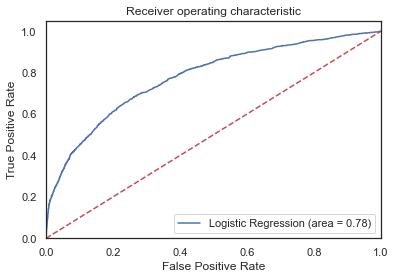

In [39]:
plot_roc_auc(glm_logit_results)

In [40]:
def odds_ratios(results):
    return np.exp(results.params)

In [41]:
odds_ratios(glm_logit_results)

const                                                           0.080571
Car                                                             1.223191
BCN_over_barri_future                                           1.235911
BCN_over_barri_satisfaction                                     1.582641
BCN_over_barri_security                                         1.460676
District_CIUTAT VELLA                                           1.496812
District_GRÀCIA                                                 1.232140
District_HORTA - GUINARDÓ                                       1.456581
District_LES CORTS                                              0.786651
District_NOU BARRIS                                             1.293219
District_SANT ANDREU                                            1.205319
District_SANT MARTÍ                                             1.154542
District_SANTS - MONTJUÏC                                       1.442215
District_SARRIÀ - SANT GERVASI                     

In [42]:
def pseudo_r2(results):
    return (1 - results.llf / results.llnull)

In [43]:
pseudo_r2(glm_logit_results)

0.16858251698448823

In [44]:
def adj_count_r2(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    df = pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])
    return round((df[0][0] + df[1][1] - (df[0][0]+df[1][0]))/(df[0][1]+df[1][1]),3)

In [45]:
adj_count_r2(glm_logit_results)

0.094

# Probit

In [48]:
glm_probit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.probit))
glm_probit_results = glm_probit.fit()
glm_probit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12732
Model Family:                                Binomial   Df Model:                           25
Link Function:                                 probit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3704.6
Date:                                Sun, 09 May 2021   Deviance:                       7409.3
Time:                                        22:14:59   Pearson chi2:                 1.31e+04
No. Iterations:                                     7                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.4036      0.075    -18.812      0.000      -1.550      -1.257
Car                                                              0.1042      0.036      2.909      0.004       0.034       0.174
BCN_over_barri_future                                            0.1120      0.048      2.328      0.020       0.018       0.206
BCN_over_barri_satisfaction                                      0.2673      0.084      3.190      0.001       0.103       0.432
BCN_over_barri_security                                          0.2132      0.065      3.258      0.001       0.085       0.341
District_CIUTAT VELLA                                            0.2049      0.071      2.872      0.004       0.065       0.345
District_GRÀCIA                                                  0.1054      0.074      1.430      0.153      -0.039       0.250
District_HORTA - GUINARDÓ                                        0.1769      0.063      2.818      0.005       0.054       0.300
District_LES CORTS                                              -0.1057      0.082     -1.289      0.197      -0.266       0.055
District_NOU BARRIS                                              0.1225      0.063      1.936      0.053      -0.002       0.246
District_SANT ANDREU                                             0.0739      0.069      1.076      0.282      -0.061       0.209
District_SANT MARTÍ                                              0.0545      0.063      0.861      0.390      -0.070       0.179
District_SANTS - MONTJUÏC                                        0.1862      0.065      2.882      0.004       0.060       0.313
District_SARRIÀ - SANT GERVASI                                  -0.1119      0.083     -1.347      0.178      -0.275       0.051
No_of_people_in_the_house_THREE OR MORE                         -0.1416      0.053     -2.651      0.008      -0.246      -0.037
No_of_people_in_the_house_TWO                                   -0.0265      0.040     -0.669      0.503      -0.104       0.051
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.7527      0.075    -10.028      0.000      -0.900      -0.606
Time_living_in_barri_MORE THAN 10 YEARS                         -0.4869      0.059     -8.300      0.000      -0.602      -0.372
Barri_future_IT WILL STAY THE SAME                              -0.0009      0.042     -0.023      0.982      -0.083       0.081
Barri_future_IT WILL WORSEN                                      0.12

In [49]:
glm_probit_results.aic

7461.251049472865

In [50]:
glm_probit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-112957.97951326493

In [51]:
glm_classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0.0,11248,92
1.0,1200,218


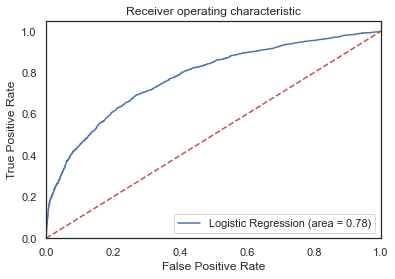

In [52]:
plot_roc_auc(glm_probit_results)

In [53]:
odds_ratios(glm_probit_results)

const                                                           0.245720
Car                                                             1.109768
BCN_over_barri_future                                           1.118549
BCN_over_barri_satisfaction                                     1.306431
BCN_over_barri_security                                         1.237660
District_CIUTAT VELLA                                           1.227442
District_GRÀCIA                                                 1.111139
District_HORTA - GUINARDÓ                                       1.193488
District_LES CORTS                                              0.899712
District_NOU BARRIS                                             1.130301
District_SANT ANDREU                                            1.076707
District_SANT MARTÍ                                             1.056037
District_SANTS - MONTJUÏC                                       1.204621
District_SARRIÀ - SANT GERVASI                     

In [54]:
pseudo_r2(glm_probit_results)

0.16774749994828797

In [55]:
adj_count_r2(glm_probit_results)

0.089

# Scobit

In [56]:
glm_scobit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.cloglog))
glm_scobit_results = glm_scobit.fit()
glm_scobit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12732
Model Family:                                Binomial   Df Model:                           25
Link Function:                                cloglog   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3704.3
Date:                                Sun, 09 May 2021   Deviance:                       7408.6
Time:                                        22:15:02   Pearson chi2:                 1.28e+04
No. Iterations:                                     8                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.6527      0.126    -21.078      0.000      -2.899      -2.406
Car                                                              0.1832      0.060      3.052      0.002       0.066       0.301
BCN_over_barri_future                                            0.1780      0.077      2.308      0.021       0.027       0.329
BCN_over_barri_satisfaction                                      0.3450      0.111      3.097      0.002       0.127       0.563
BCN_over_barri_security                                          0.3047      0.095      3.196      0.001       0.118       0.492
District_CIUTAT VELLA                                            0.3560      0.119      2.993      0.003       0.123       0.589
District_GRÀCIA                                                  0.2073      0.134      1.548      0.122      -0.055       0.470
District_HORTA - GUINARDÓ                                        0.3800      0.110      3.449      0.001       0.164       0.596
District_LES CORTS                                              -0.2211      0.165     -1.341      0.180      -0.544       0.102
District_NOU BARRIS                                              0.2736      0.108      2.534      0.011       0.062       0.485
District_SANT ANDREU                                             0.2264      0.116      1.948      0.051      -0.001       0.454
District_SANT MARTÍ                                              0.1633      0.112      1.458      0.145      -0.056       0.383
District_SANTS - MONTJUÏC                                        0.3578      0.109      3.275      0.001       0.144       0.572
District_SARRIÀ - SANT GERVASI                                  -0.1916      0.165     -1.163      0.245      -0.514       0.131
No_of_people_in_the_house_THREE OR MORE                         -0.2470      0.091     -2.721      0.006      -0.425      -0.069
No_of_people_in_the_house_TWO                                   -0.0386      0.066     -0.581      0.561      -0.169       0.092
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.2264      0.123    -10.003      0.000      -1.467      -0.986
Time_living_in_barri_MORE THAN 10 YEARS                         -0.7830      0.088     -8.868      0.000      -0.956      -0.610
Barri_future_IT WILL STAY THE SAME                               0.0056      0.071      0.078      0.938      -0.134       0.145
Barri_future_IT WILL WORSEN                                      0.19

In [57]:
glm_scobit_results.aic

7460.625476410854

In [58]:
glm_scobit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-112958.60508632693

In [59]:
glm_classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0.0,11243,97
1.0,1198,220


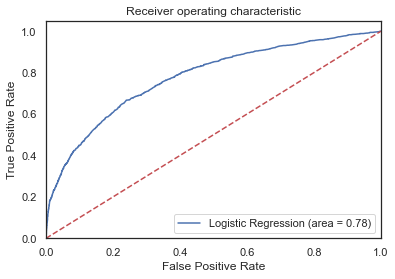

In [60]:
plot_roc_auc(glm_scobit_results)

In [61]:
odds_ratios(glm_scobit_results)

const                                                           0.070463
Car                                                             1.201043
BCN_over_barri_future                                           1.194784
BCN_over_barri_satisfaction                                     1.412017
BCN_over_barri_security                                         1.356246
District_CIUTAT VELLA                                           1.427640
District_GRÀCIA                                                 1.230292
District_HORTA - GUINARDÓ                                       1.462313
District_LES CORTS                                              0.801617
District_NOU BARRIS                                             1.314693
District_SANT ANDREU                                            1.254019
District_SANT MARTÍ                                             1.177383
District_SANTS - MONTJUÏC                                       1.430155
District_SARRIÀ - SANT GERVASI                     

In [62]:
pseudo_r2(glm_scobit_results)

0.16781776814966776

In [63]:
adj_count_r2(glm_scobit_results)

0.087

# Results comparison

In [65]:
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12732
Model Family:                                Binomial   Df Model:                           25
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3700.9
Date:                                Sun, 09 May 2021   Deviance:                       7401.8
Time:                                        22:16:07   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.5186      0.142    -17.788      0.000      -2.796      -2.241
Car                                                              0.2015      0.068      2.948      0.003       0.068       0.335
BCN_over_barri_future                                            0.2118      0.090      2.357      0.018       0.036       0.388
BCN_over_barri_satisfaction                                      0.4591      0.142      3.227      0.001       0.180       0.738
BCN_over_barri_security                                          0.3789      0.117      3.237      0.001       0.149       0.608
District_CIUTAT VELLA                                            0.4033      0.135      2.979      0.003       0.138       0.669
District_GRÀCIA                                                  0.2088      0.146      1.431      0.152      -0.077       0.495
District_HORTA - GUINARDÓ                                        0.3761      0.121      3.098      0.002       0.138       0.614
District_LES CORTS                                              -0.2400      0.173     -1.386      0.166      -0.579       0.099
District_NOU BARRIS                                              0.2571      0.121      2.119      0.034       0.019       0.495
District_SANT ANDREU                                             0.1867      0.132      1.420      0.156      -0.071       0.445
District_SANT MARTÍ                                              0.1437      0.123      1.166      0.244      -0.098       0.385
District_SANTS - MONTJUÏC                                        0.3662      0.123      2.981      0.003       0.125       0.607
District_SARRIÀ - SANT GERVASI                                  -0.2224      0.174     -1.277      0.202      -0.564       0.119
No_of_people_in_the_house_THREE OR MORE                         -0.2815      0.103     -2.746      0.006      -0.482      -0.081
No_of_people_in_the_house_TWO                                   -0.0536      0.076     -0.709      0.478      -0.202       0.095
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.4356      0.141    -10.150      0.000      -1.713      -1.158
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9282      0.105     -8.801      0.000      -1.135      -0.722
Barri_future_IT WILL STAY THE SAME                               0.0015      0.080      0.019      0.985      -0.155       0.158
Barri_future_IT WILL WORSEN                                      0.21

In [66]:
glm_probit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12732
Model Family:                                Binomial   Df Model:                           25
Link Function:                                 probit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3704.6
Date:                                Sun, 09 May 2021   Deviance:                       7409.3
Time:                                        22:16:07   Pearson chi2:                 1.31e+04
No. Iterations:                                     7                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.4036      0.075    -18.812      0.000      -1.550      -1.257
Car                                                              0.1042      0.036      2.909      0.004       0.034       0.174
BCN_over_barri_future                                            0.1120      0.048      2.328      0.020       0.018       0.206
BCN_over_barri_satisfaction                                      0.2673      0.084      3.190      0.001       0.103       0.432
BCN_over_barri_security                                          0.2132      0.065      3.258      0.001       0.085       0.341
District_CIUTAT VELLA                                            0.2049      0.071      2.872      0.004       0.065       0.345
District_GRÀCIA                                                  0.1054      0.074      1.430      0.153      -0.039       0.250
District_HORTA - GUINARDÓ                                        0.1769      0.063      2.818      0.005       0.054       0.300
District_LES CORTS                                              -0.1057      0.082     -1.289      0.197      -0.266       0.055
District_NOU BARRIS                                              0.1225      0.063      1.936      0.053      -0.002       0.246
District_SANT ANDREU                                             0.0739      0.069      1.076      0.282      -0.061       0.209
District_SANT MARTÍ                                              0.0545      0.063      0.861      0.390      -0.070       0.179
District_SANTS - MONTJUÏC                                        0.1862      0.065      2.882      0.004       0.060       0.313
District_SARRIÀ - SANT GERVASI                                  -0.1119      0.083     -1.347      0.178      -0.275       0.051
No_of_people_in_the_house_THREE OR MORE                         -0.1416      0.053     -2.651      0.008      -0.246      -0.037
No_of_people_in_the_house_TWO                                   -0.0265      0.040     -0.669      0.503      -0.104       0.051
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.7527      0.075    -10.028      0.000      -0.900      -0.606
Time_living_in_barri_MORE THAN 10 YEARS                         -0.4869      0.059     -8.300      0.000      -0.602      -0.372
Barri_future_IT WILL STAY THE SAME                              -0.0009      0.042     -0.023      0.982      -0.083       0.081
Barri_future_IT WILL WORSEN                                      0.12

In [67]:
glm_scobit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12732
Model Family:                                Binomial   Df Model:                           25
Link Function:                                cloglog   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3704.3
Date:                                Sun, 09 May 2021   Deviance:                       7408.6
Time:                                        22:16:07   Pearson chi2:                 1.28e+04
No. Iterations:                                     8                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.6527      0.126    -21.078      0.000      -2.899      -2.406
Car                                                              0.1832      0.060      3.052      0.002       0.066       0.301
BCN_over_barri_future                                            0.1780      0.077      2.308      0.021       0.027       0.329
BCN_over_barri_satisfaction                                      0.3450      0.111      3.097      0.002       0.127       0.563
BCN_over_barri_security                                          0.3047      0.095      3.196      0.001       0.118       0.492
District_CIUTAT VELLA                                            0.3560      0.119      2.993      0.003       0.123       0.589
District_GRÀCIA                                                  0.2073      0.134      1.548      0.122      -0.055       0.470
District_HORTA - GUINARDÓ                                        0.3800      0.110      3.449      0.001       0.164       0.596
District_LES CORTS                                              -0.2211      0.165     -1.341      0.180      -0.544       0.102
District_NOU BARRIS                                              0.2736      0.108      2.534      0.011       0.062       0.485
District_SANT ANDREU                                             0.2264      0.116      1.948      0.051      -0.001       0.454
District_SANT MARTÍ                                              0.1633      0.112      1.458      0.145      -0.056       0.383
District_SANTS - MONTJUÏC                                        0.3578      0.109      3.275      0.001       0.144       0.572
District_SARRIÀ - SANT GERVASI                                  -0.1916      0.165     -1.163      0.245      -0.514       0.131
No_of_people_in_the_house_THREE OR MORE                         -0.2470      0.091     -2.721      0.006      -0.425      -0.069
No_of_people_in_the_house_TWO                                   -0.0386      0.066     -0.581      0.561      -0.169       0.092
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.2264      0.123    -10.003      0.000      -1.467      -0.986
Time_living_in_barri_MORE THAN 10 YEARS                         -0.7830      0.088     -8.868      0.000      -0.956      -0.610
Barri_future_IT WILL STAY THE SAME                               0.0056      0.071      0.078      0.938      -0.134       0.145
Barri_future_IT WILL WORSEN                                      0.19

In [68]:
glm_classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,11240,100
1.0,1185,233


In [69]:
glm_classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0.0,11248,92
1.0,1200,218


In [70]:
glm_classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0.0,11243,97
1.0,1198,220


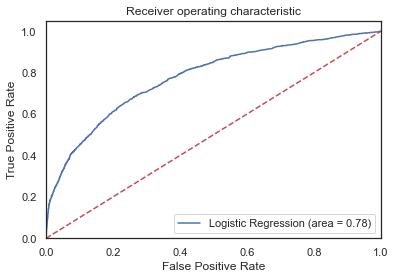

In [71]:
plot_roc_auc(glm_logit_results)

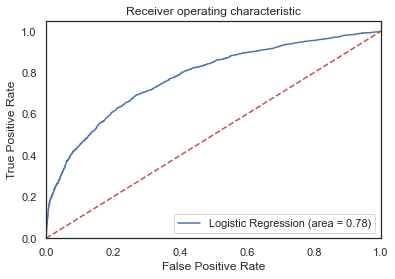

In [72]:
plot_roc_auc(glm_probit_results)

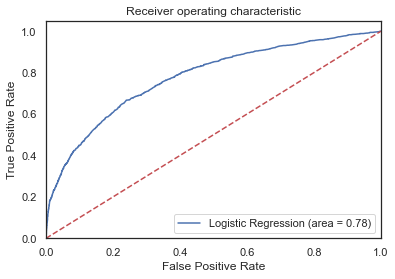

In [73]:
plot_roc_auc(glm_scobit_results)

In [74]:
print("Logit \n Pseudo R2:", pseudo_r2(glm_logit_results), "\n Adj Count R2:", adj_count_r2(glm_logit_results))

Logit 
 Pseudo R2: 0.16858251698448823 
 Adj Count R2: 0.094


In [75]:
print("Probit \n Pseudo R2:", pseudo_r2(glm_probit_results), "\n Adj Count R2:", adj_count_r2(glm_probit_results))

Probit 
 Pseudo R2: 0.16774749994828797 
 Adj Count R2: 0.089


In [76]:
print("Scobit \n Pseudo R2:", pseudo_r2(glm_scobit_results), "\n Adj Count R2:", adj_count_r2(glm_scobit_results))

Scobit 
 Pseudo R2: 0.16781776814966776 
 Adj Count R2: 0.087


In [77]:
print("Logit \n AIC:", glm_logit_results.aic, "BIC:", glm_logit_results.bic)

Logit 
 AIC: 7453.817186731193 BIC: -112965.4133760066


C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


In [78]:
print("Probit \n AIC:", glm_probit_results.aic, "BIC:", glm_probit_results.bic)

Probit 
 AIC: 7461.251049472865 BIC: -112957.97951326493


In [79]:
print("Scobit \n AIC:", glm_scobit_results.aic, "BIC:", glm_scobit_results.bic)

Scobit 
 AIC: 7460.625476410854 BIC: -112958.60508632693
